In [13]:
# 📊 AI-Driven Global Car Sales Analysis (2010–2025)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create synthetic dataset
np.random.seed(42)
years = list(range(2010, 2025))
brands = ['Toyota', 'Tesla', 'Ford']
regions = ['North America', 'Europe']
types = ['EV', 'Non-EV']
data = []

for year in years:
    for brand in brands:
        for region in regions:
            for car_type in types:
                base = {
                    'Toyota': 7,
                    'Tesla': 0.5 if car_type == 'Non-EV' else 2.5,
                    'Ford': 5
                }[brand]
                growth = np.random.normal(1.05, 0.1)
                noise = np.random.normal(0, 0.3)
                sales = round(base * growth**(year - 2010) + noise, 2)
                data.append([year, brand, region, car_type, max(sales, 0)])

df = pd.DataFrame(data, columns=['Year', 'Brand', 'Region', 'Type', 'Sales_Million'])
df.to_csv("car_sales_data.csv", index=False)
df.head()


,Year,Brand,Region,Type,Sales_Million
0,2010,Toyota,North America,EV,6.96
1,2010,Toyota,North America,Non-EV,7.46
2,2010,Toyota,Europe,EV,6.93
3,2010,Toyota,Europe,Non-EV,7.23
4,2010,Tesla,North America,EV,2.66


In [14]:
# Step 2: Train model for Toyota sales prediction

toyota_df = df[df['Brand'] == 'Toyota'].groupby('Year')['Sales_Million'].sum().reset_index()

X = toyota_df[['Year']]
y = toyota_df['Sales_Million']

model = LinearRegression()
model.fit(X, y)

future_df = pd.DataFrame({'Year': [2025]})
future_pred = model.predict(future_df)

print(f"Predicted Toyota Sales in 2025: {future_pred[0]:.2f} million units")


Predicted Toyota Sales in 2025: 95.46 million units


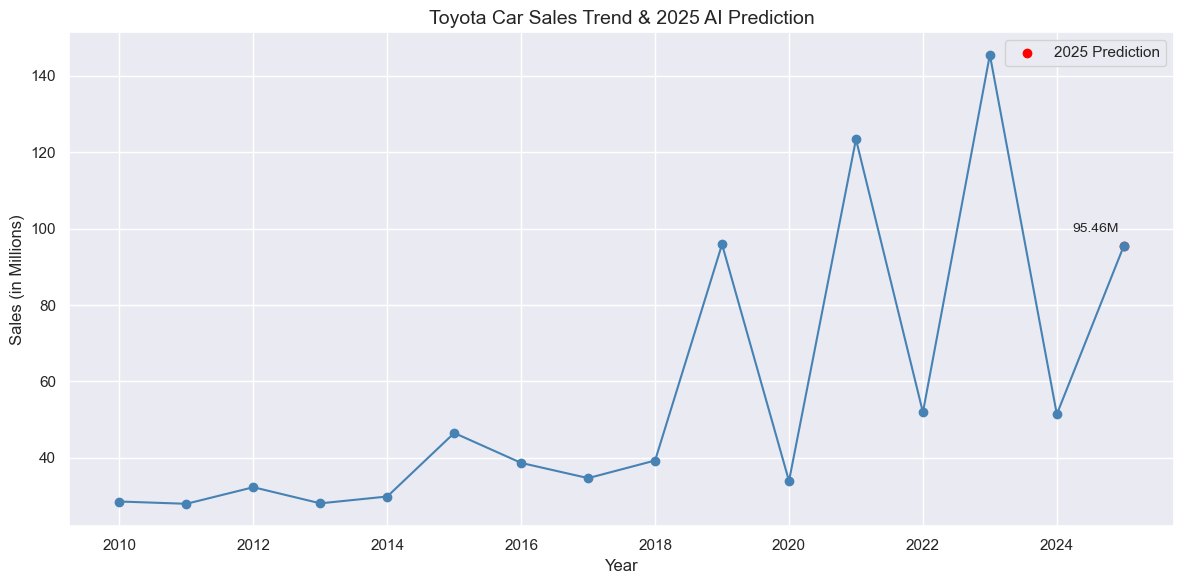

In [15]:
# Step 3: Visualization

toyota_extended = pd.concat(
    [toyota_df, pd.DataFrame({'Year': [2025], 'Sales_Million': future_pred})],
    ignore_index=True
)

plt.figure(figsize=(12, 6))
plt.plot(toyota_extended['Year'], toyota_extended['Sales_Million'], marker='o', linestyle='-', color='steelblue')
plt.title("Toyota Car Sales Trend & 2025 AI Prediction", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales (in Millions)")
plt.grid(True)
plt.scatter(2025, future_pred, color='red', label='2025 Prediction')
plt.annotate(f"{future_pred[0]:.2f}M", (2025, future_pred), textcoords="offset points", xytext=(-20,10), ha='center', fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("toyota_sales_prediction_2025.png")
plt.show()
